이번 프로젝트의 목적
: 다음 분기에는 어떤 게임을 설계해야 할까?

필수적인 조건

1. "지역에 따라서 선호하는 게임장르가 다를까?" 라는 질문에 대답
2. "연도별 게임의 트렌드가 있을까?" 라는 질문에 대답
3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함

In [ ]:
## 데이터셋 불러오기
from google.colab import files
uploaded = files.upload()

Saving vgames2 (1).csv to vgames2 (1) (1).csv


In [ ]:
## 데이터프레임에서 필요없는 feature 인 Unnamed: 0을 제거
import pandas as pd
df = pd.read_csv('vgames2.csv')
df = df.drop(columns = ['Unnamed: 0'], axis = 1)

In [ ]:
## 단위 통일과 출고량의 feature 들의 타입 변환
def unit(x):
  if str(x).find('K') != -1:
    return float(str(x).split('K')[0].replace('.',''))
  elif str(x).find('M') != -1:
    return float(str(x).split('M')[0].replace('.',''))
  else:
    return float(str(x).replace('.',''))
  
for col in ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']:
  df[col] = df[col].apply(unit)

df.head(12)

In [ ]:
## 결측치 제거 후 확인
df = df.dropna(axis = 0)
df.isnull().sum()

In [ ]:
## 1. "지역에 따라서 선호하는 게임장르가 다를까?" 라는 질문에 대답
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

df_genre = df.groupby(df['Genre'])['Total_Sales'].sum()

df_genre_na = df.groupby(df['Genre'])['NA_Sales'].sum()

df_genre_eu = df.groupby(df['Genre'])['EU_Sales'].sum()

df_genre_jp = df.groupby(df['Genre'])['JP_Sales'].sum()

df_genre_other = df.groupby(df['Genre'])['Other_Sales'].sum()

df_genre = df_genre.combine_first(df_genre_na).combine_first(df_genre_eu).combine_first(df_genre_jp).combine_first(df_genre_other)

label = ['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
       'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
       'Shooter']
index = np.arange(len(label))

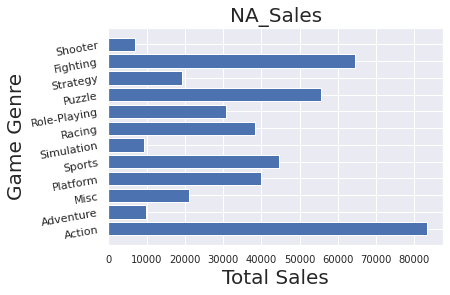

In [ ]:
## 북미지역에 게임장르별 출고량의 합
sns.set(style = 'darkgrid')
plt.barh(index, df_genre_na)
plt.title('NA_Sales',fontsize = 20)
plt.ylabel('Game Genre', fontsize = 20)
plt.xlabel('Total Sales',fontsize = 20)
plt.xticks(fontsize=10)
plt.yticks(index, label, fontsize = 11, rotation = 10)
plt.show()

북미 지역
1. Action  
2. Fighting
3. Puzzle

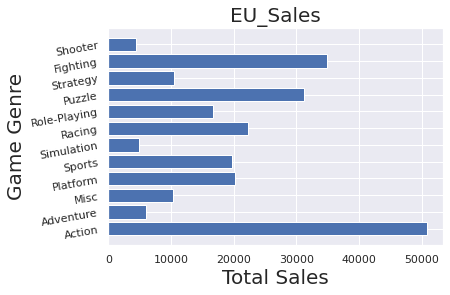

In [ ]:
## 유럽지역에 게임장르별 출고량의 합
sns.set(style = 'darkgrid')
plt.barh(index, df_genre_eu)
plt.title('EU_Sales',fontsize = 20)
plt.ylabel('Game Genre', fontsize = 20)
plt.xlabel('Total Sales',fontsize = 20)
plt.yticks(index, label, fontsize = 11, rotation = 10)
plt.show()

유럽 지역
1. Action  
2. Fighting
3. Puzzle

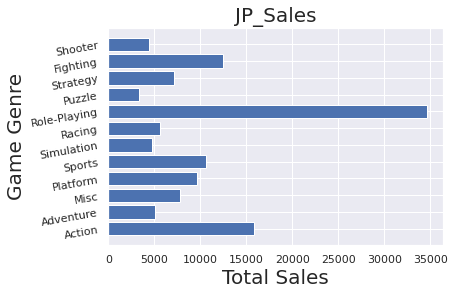

In [ ]:
## 일본지역에 게임장르별 출고량의 합
sns.set(style = 'darkgrid')
plt.barh(index, df_genre_jp)
plt.title('JP_Sales',fontsize = 20)
plt.ylabel('Game Genre', fontsize = 20)
plt.xlabel('Total Sales',fontsize = 20)
plt.yticks(index, label, fontsize = 11, rotation = 10)
plt.show()

일본지역
1. Role-Playing 
2. Action  
3. Fighting 

In [ ]:
## 기타지역에 게임장르별 출고량의 합
sns.set(style = 'darkgrid')
plt.barh(index, df_genre_other)
plt.title('Other_Sales',fontsize = 20)
plt.ylabel('Game Genre', fontsize = 20)
plt.xlabel('Total Sales',fontsize = 20)
plt.yticks(index, label, fontsize = 11, rotation = 10)
plt.show()

기타 지역
1. Action 
2. Fighting 
3. Puzzle

첫번째 질문  "지역에 따라서 선호하는 게임장르가 다를까?"

지역에 따라서는 평균적으로 Action장르가 인기가 많았고
예외로 일본지역만 Role-Playing장르가 인기가 많다는걸 
차트를 통해 알수 있다


In [ ]:
## 2."연도별 게임의 트렌드가 있을까?" 라는 질문에 대답
## 연도에 4자리로 표기되지 않은 데이터를 함수를 통해 수정
def year(x):
  if (x >= 0) & (x < 20):
    return int(2000 + x)
  elif (x > 30) & (x < 1000):
    return int(1900 + x)
  else:
    return int(x)

df['Year'] = df['Year'].apply(year)

In [ ]:
year_sale_dx = df.groupby(by=['Year', 'Genre'])['Total_Sales'].sum().reset_index()
year_sale = year_sale_dx.groupby(by=['Year'])['Total_Sales'].transform(max) == year_sale_dx['Total_Sales']
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)

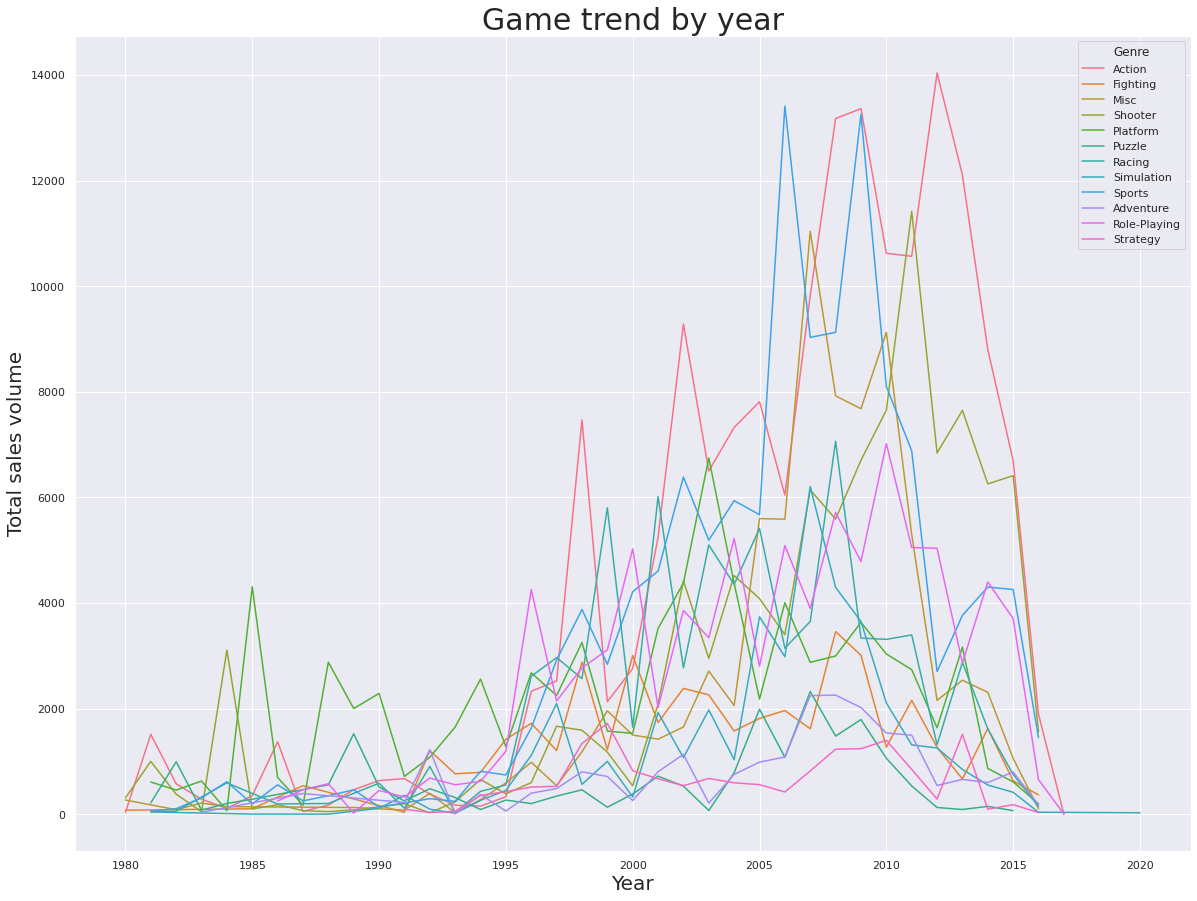

In [ ]:
plt.figure(figsize=(20,15))
sns.lineplot(data = year_sale_dx, x='Year', y='Total_Sales', hue = 'Genre')

plt.title("Game trend by year", fontsize=30)
plt.xlabel("Year", fontsize=20)
plt.ylabel("Total sales volume", fontsize=20)

plt.xticks(rotation=0)
plt.show()

두번째 질문 "연도별 게임의 트렌드가 있을까?"
*  1980 ~ 1983 : Action
*  1980 ~ 1985 : Shooter
*  1985 ~ 1995 : Platform
*  1995년도에는 잠깐 Role-Playing
*  1997 ~ 2015 : Action
*  2000 ~ 2010 : Sports

2010년 이후부터는 Sports장르는 하락한다


In [ ]:
## 3. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스
sortdf = df.sort_values(by=['Total_Sales'],ascending = False)

top_game_sale = sortdf.head(20)
top_game_sale = top_game_sale[['Name', 'Year', 'Genre', 'Total_Sales']]
top_game_sale = top_game_sale.sort_values(by=['Total_Sales'], ascending=False)
top_game_sale = top_game_sale.reset_index(drop=True)
top_game_sale.head(20)

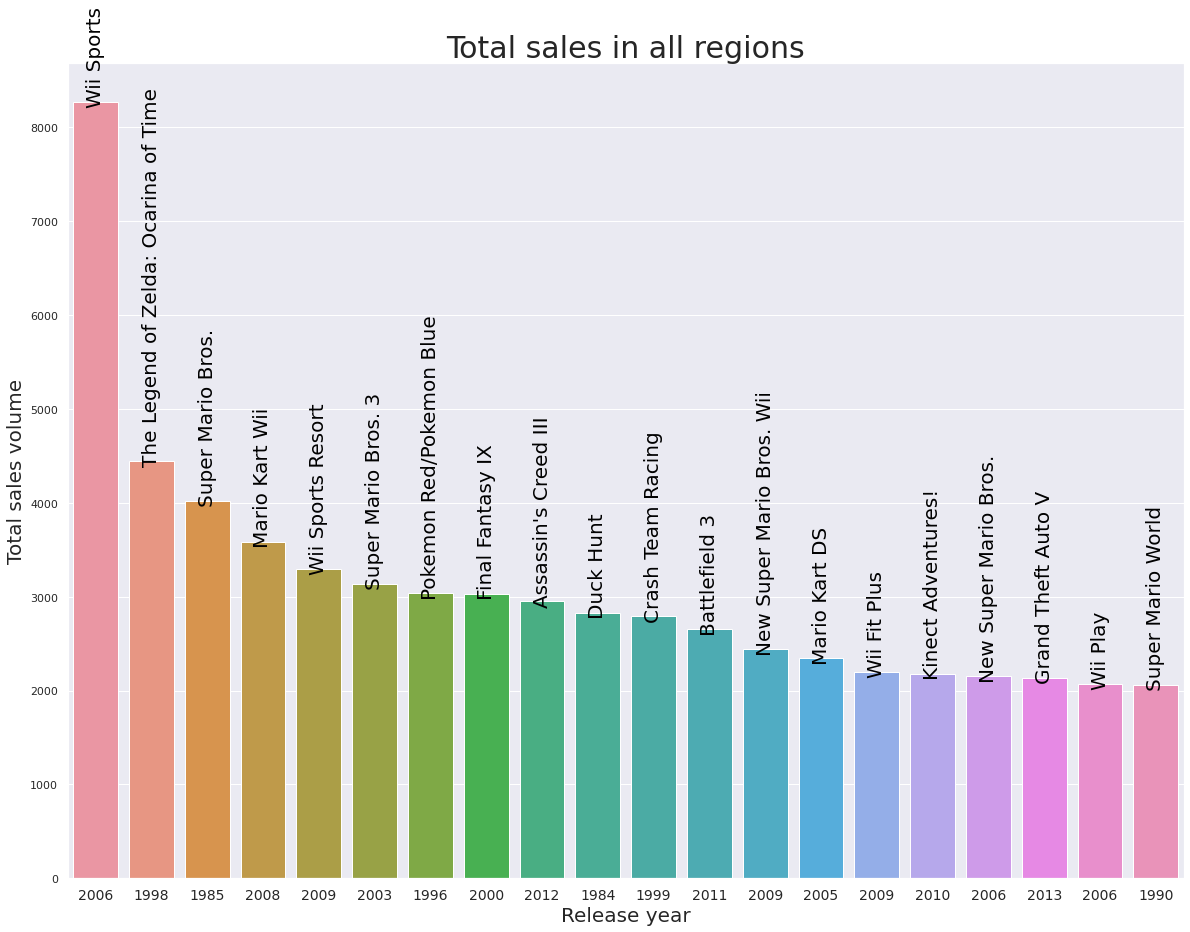

In [ ]:
name = top_game_sale['Name']
year = top_game_sale['Year']
y = np.arange(0, 20)
plt.figure(figsize=(20,15))
g = sns.barplot(x = 'Name', y = 'Total_Sales', data = top_game_sale)
index = 0
for value in top_game_sale['Total_Sales']:
  g.text(index, value - 18, name[index], color = '#000', size = 20, rotation = 90, ha = 'center')
  index += 1

plt.xticks(y, top_game_sale['Year'],fontsize = 14, rotation = 0)
plt.title('Total sales in all regions',fontsize = 30)
plt.xlabel('Release year',fontsize = 20)
plt.ylabel('Total sales volume', fontsize = 20)
plt.show()

출고량이 높은 게임을 조사해봤을때 Wii Sports가 압도적 1등이었다
연도별 장르차트를 살펴 봤을 때 전체적으로 인기가 있던 Action장르는 3가지 밖에 없다는게 의아했다

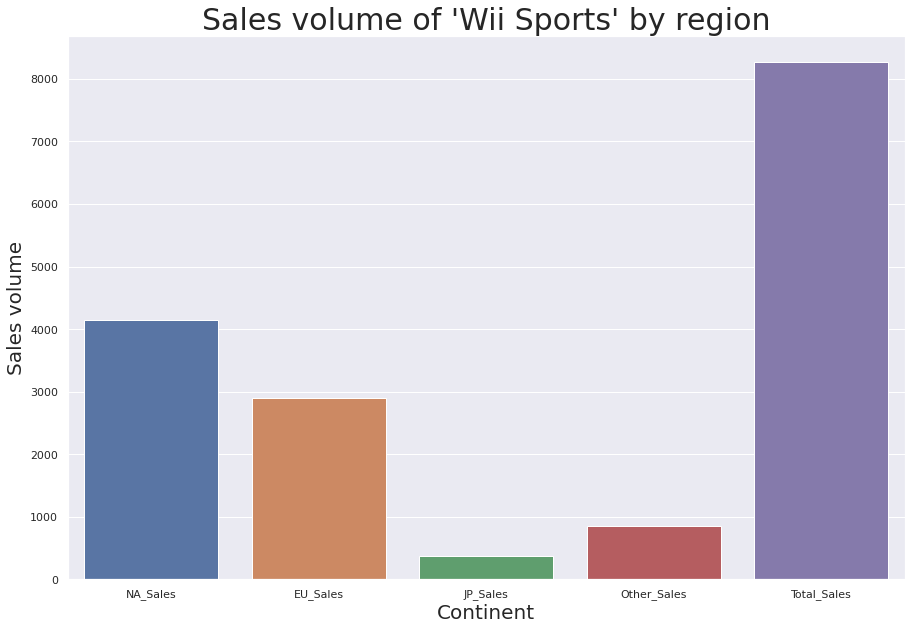

In [ ]:
## 출고량이 제일 많은 Wii Sports 에 대한 지역별 분석
df_Wii = df[df['Name'] == 'Wii Sports']
df_1st = df_Wii.drop(['Year'], axis=1)

plt.figure(figsize=(15, 10))
plt.title("Sales volume of 'Wii Sports' by region", fontsize=30)
plt.xlabel("Continent", fontsize=20)
plt.ylabel("Sales volume", fontsize=20)

sns.barplot(data=df_1st)

지역별로 'Wii Sports' 의 출고량을 조사해봤을 때
북미지역에서는 절반정도를 차지하고있었다




In [ ]:
year_sale_dx = df.groupby(by=['Platform'])['Total_Sales'].sum().reset_index()
year_sale = year_sale_dx.groupby(by=['Platform'])['Total_Sales'].transform(max) == year_sale_dx['Total_Sales']
year_sale_max = year_sale_dx[year_sale].reset_index(drop=True)

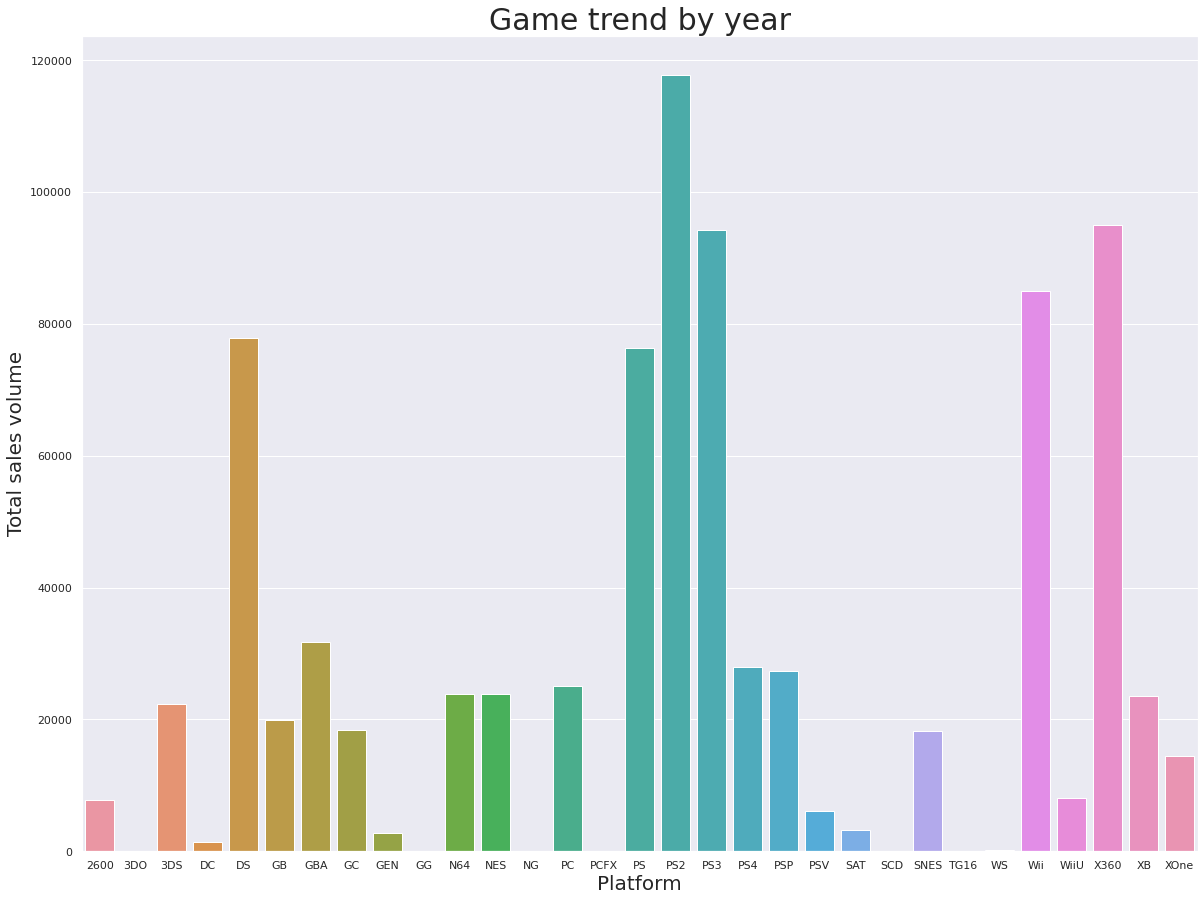

In [ ]:
plt.figure(figsize=(20,15))
sns.barplot(data = year_sale_dx, x='Platform', y='Total_Sales')

plt.title("Sales volume by platform", fontsize=30)
plt.xlabel("Platform", fontsize=20)
plt.ylabel("Total sales volume", fontsize=20)

plt.xticks(rotation=0)
plt.show()

플랫폼별 총매출량을 분석

1.  PS2
2.  PS3
3.  X360

결론
1.  북미지역에는 PS2 플랫폼으로 Action , Sports 장르의 게임을 만드는것이 좋을 것 같다
2.  유럽지역에는 PS2 플랫폼으로 Action , Sports 장르의 게임을 만드는것이 좋을 것 같다
3.  일본지역에는 PS2 플랫폼으로 Action , Sports 장르의 게임을 만드는것이 좋을 것 같다
4.  기타지역에는 PS2 플랫폼으로 Action , Sports 장르의 게임을 만드는것이 좋을 것 같다